In [6]:
%pip install seaborn

In [7]:
%pip install missingno

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import missingno as msno

## 1) EDA (Exploratory Data Analysis)

In [9]:
train = pd.read_csv('titanic/train.csv') #Dados para treino e validação
test = pd.read_csv('titanic/test.csv') #Dados para previsão

In [10]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

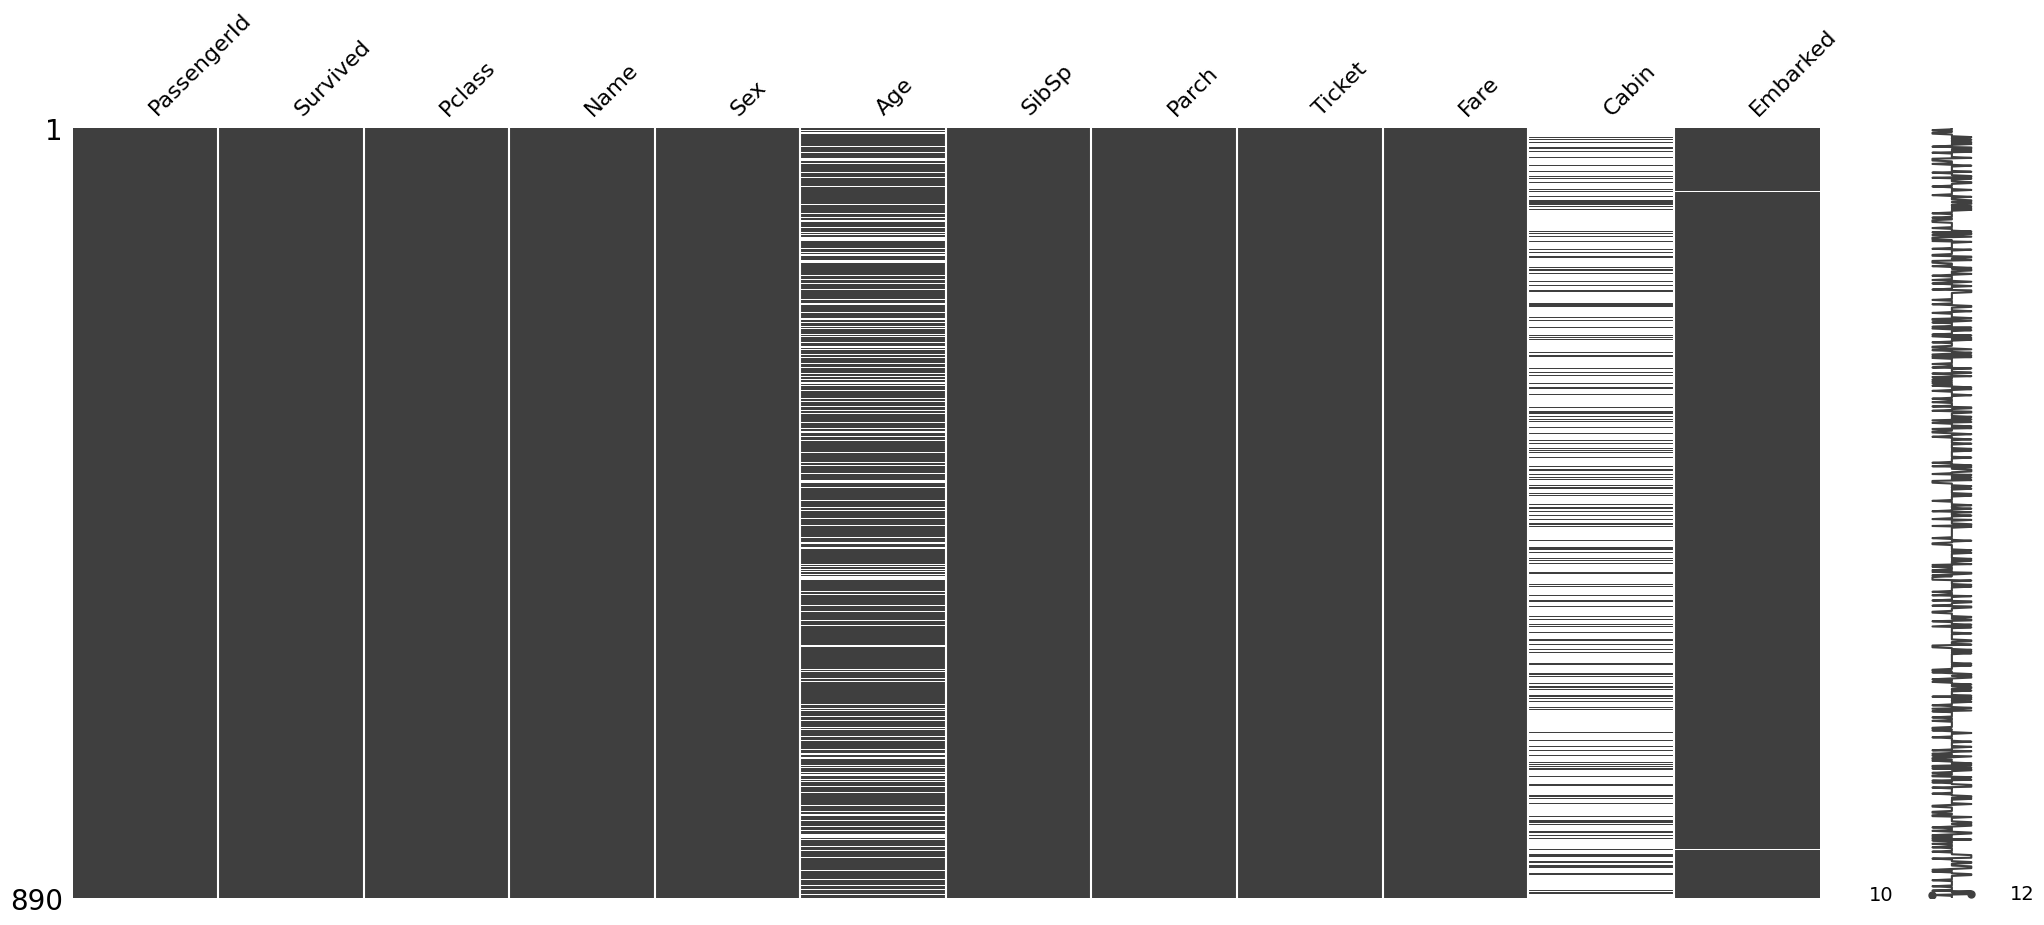

In [12]:
msno.matrix(train.sample(890))  # Matrix with missing values
plt.show()  # Show the graph

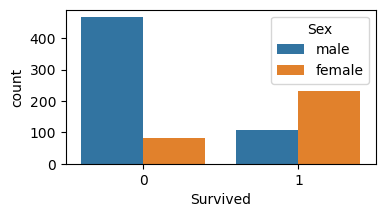

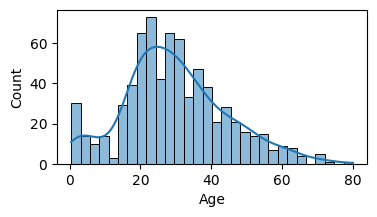

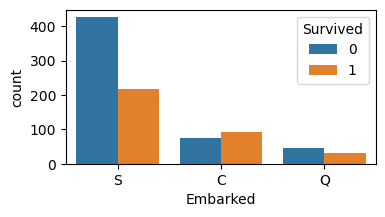

<Figure size 400x200 with 0 Axes>

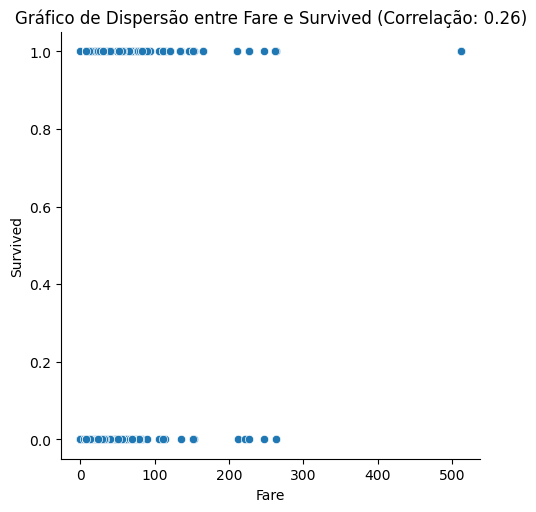

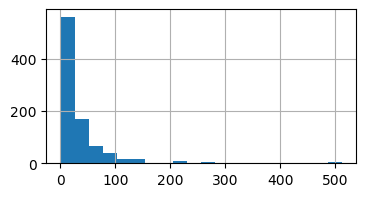

In [13]:
plt.figure(figsize=(4, 2))
sns.countplot(train, x='Survived', hue='Sex')
plt.show()
plt.figure(figsize=(4, 2))
sns.histplot(train["Age"], bins=30, kde=True)  # kde=True add density curve
plt.show()

plt.figure(figsize=(4, 2))
sns.countplot(data=train, x="Embarked", hue="Survived")
plt.show()

# Correlation between 'Fare' e 'Survived'
plt.figure(figsize=(4, 2))
sns.relplot(data=train, x="Fare", y="Survived", kind="scatter")
plt.title(f'Gráfico de Dispersão entre Fare e Survived (Correlação: {train['Fare'].corr(train['Survived']):.2f})')
plt.show()

plt.figure(figsize=(4, 2))
train["Fare"].hist(bins=20)
plt.show()

## 2) Processing (Cleaning and Manipulation)

### Dealing with missing data And Feature Engineering

In [14]:
#getting titles from name
dataset= [train, test] # Reference list for train and test dataframes
                      
for data in dataset:
    data['Title']= data['Name'].str.extract(pat= ' ([A-Za-z]+)\\.')
    
train['Title'].unique()
#try with just 4 titles

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [15]:
pd.crosstab(train['Sex'], train['Title'])

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [16]:
for data in dataset:
    data["Title"] = data["Title"].replace(['Ms', 'Mlle'], 'Miss')
    data["Title"] = data["Title"].replace(['Mme', 'Countess', 'Lady'], 'Mrs')
    data["Title"] = data["Title"].replace(['Dr', 'Rev', 'Sir', 'Col', 'Major', 'Capt', 'Jonkheer', 'Don'], 'Mr')

pd.crosstab(train["Title"], train["Survived"])
train[['Title', 'Survived']].groupby(['Title'], as_index=True).mean()   # Evaluate the hypothesis that the "Title" variable impacts "Survived",
                                                                        # i.e., there is a difference in survival based on the title a person has, 
                                                                        # which is often associated with their age. This makes "Title" a powerful feature 
                                                                        # to help fill in missing values in the "Age" column.

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.161710
Mrs,0.796875


In [17]:
train["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [19]:
# filling 'Age' with mean of Title category
train["Age"] = train.groupby("Title")["Age"].transform(lambda x : x.fillna(round(np.mean(x), 0)))
test["Age"] = test.groupby("Title")["Age"].transform(lambda x : x.fillna(round(np.mean(x), 0)))

In [20]:
#filling missing values of Embarked and Fare
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0]) #Embarked com a sua 'Moda'
test["Embarked"] = test["Embarked"].fillna(test["Embarked"].mode()[0])

test["Fare"] = test["Fare"].fillna(test["Fare"].mean())

In [21]:
train = train.assign(Relatives=train['SibSp'] + train['Parch'])
test = test.assign(Relatives=test['SibSp'] + test['Parch'])
train.head(10).sort_values("Fare", ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Relatives
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,2
5,6,0,3,"Moran, Mr. James",male,33.0,0,0,330877,8.4583,NaN,Q,Mr,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1


### Analysis of "Cabin" Individually:

In [22]:
# Working with "Cabin"
train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [23]:
#filling missing values of cabin and using them to create new column deck
#train["Cabin"]= train["Cabin"].fillna("C")
train["Deck"]= train["Cabin"].str[:1]

#test["Cabin"]= test["Cabin"].fillna("C")
test["Deck"]= test["Cabin"].str[:1]
print(train["Deck"].unique())
print(train.info())

[nan 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    object 
 13  Relatives    891 non-null    int64  
 14  Deck         204 non-null    object 
dtypes: float64(2), int64(6), object(7)
memory usage: 80.1+ KB
None


<function matplotlib.pyplot.show(close=None, block=None)>

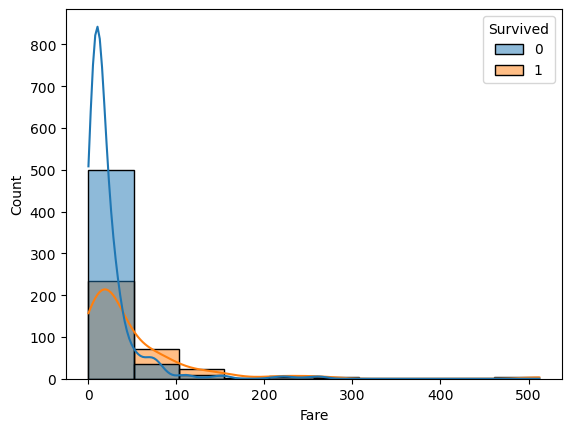

In [24]:
# Plot hist of'Fare' by'Survived'
sns.histplot(data=train, x="Fare", bins=10, hue="Survived", kde=True)  # kde=True adiciona a curva de densidade
plt.show

In [26]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Relatives,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,NaN
5,6,0,3,"Moran, Mr. James",male,33.0,0,0,330877,8.4583,NaN,Q,Mr,0,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,0,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,4,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,2,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,1,NaN


In [27]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Relatives,Deck
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,0,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,1,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,0,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,0,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,2,NaN
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,Mr,0,NaN
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,Miss,0,NaN
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,Mr,2,NaN
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,Mrs,0,NaN
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,Mr,2,NaN


In [30]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Relatives,Deck
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,0,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,1,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,0,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,0,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,2,NaN
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,Mr,0,NaN
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,Miss,0,NaN
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,Mr,2,NaN
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,Mrs,0,NaN
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,Mr,2,NaN


<AxesSubplot:xlabel='Deck', ylabel='count'>

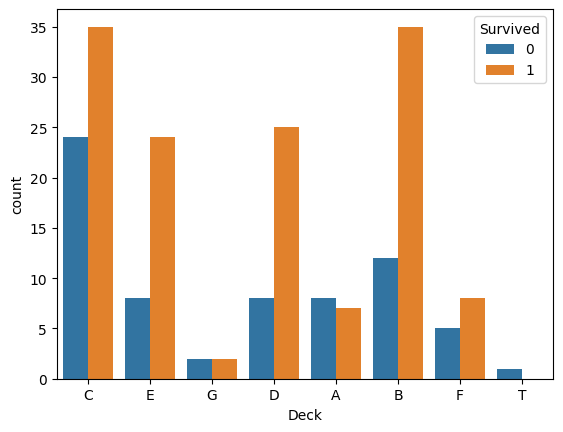

In [31]:
sns.countplot(data=train, x="Deck", hue="Survived")

In [32]:
#Verifying "Nan"
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    object 
 13  Relatives    891 non-null    int64  
 14  Deck         204 non-null    object 
dtypes: float64(2), int64(6), object(7)
memory usage: 80.1+ KB


### Changing categorical variables to ordinal

In [33]:
# Transforming 'Sex'
dataset = [train, test]
for data in dataset:
    data['Sex'] = data['Sex'].map({'female': 0, 'male': 1})

In [34]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'dataset' is a list of DataFrames
encoder = LabelEncoder()

for data in dataset:
    # Transforming 'Embarked' - consider using OneHotEncoder if the order is not relevant
    # data['Embarked'] = encoder.fit_transform(data['Embarked'])
    
    # Transforming 'Title'
    data['Title'] = encoder.fit_transform(data['Title'])
    
    # Transforming 'Deck' - use with caution
    data['Deck'] = encoder.fit_transform(data['Deck'])
    
    # Transforming 'Fare_Category' - use based on the nature of the categories
    # data['Fare_Category'] = encoder.fit_transform(data['Fare_Category'])


In [35]:
from sklearn.preprocessing import OneHotEncoder
dataset = [train, test]

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Iterate over the list of DataFrames
for i in range(len(dataset)):
    # Fit the encoder to the 'Embarked' column data of the current DataFrame
    encoder.fit(dataset[i][['Embarked']])  # Corrected: Accessing the DataFrame by index

    # Transform the 'Embarked' column data of the current DataFrame
    encoded_data = encoder.transform(dataset[i][['Embarked']])  # Corrected

    # Create a new DataFrame with the encoded columns
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Embarked']))

    # Concatenate the encoded DataFrame to the original DataFrame
    dataset[i] = pd.concat([dataset[i], encoded_df], axis=1)  # Corrected

    # Remove the original 'Embarked' column from the current DataFrame
    dataset[i].drop('Embarked', axis=1, inplace=True)  # Corrected

train, test = dataset

# Access the first DataFrame in the list (index 0)
#print(dataset)


In [36]:
train["Deck"].unique()

array([8, 2, 4, 6, 3, 0, 1, 5, 7])

In [37]:
print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Title        891 non-null    int32  
 12  Relatives    891 non-null    int64  
 13  Deck         891 non-null    int32  
 14  Embarked_C   891 non-null    float64
 15  Embarked_Q   891 non-null    float64
 16  Embarked_S   891 non-null    float64
dtypes: float64(5), int32(2), int64(7), object(3)
memory usage: 101.0+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Relatives,Deck,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,1,8,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,3,1,2,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,8,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,3,1,2,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,0,8,0.0,0.0,1.0


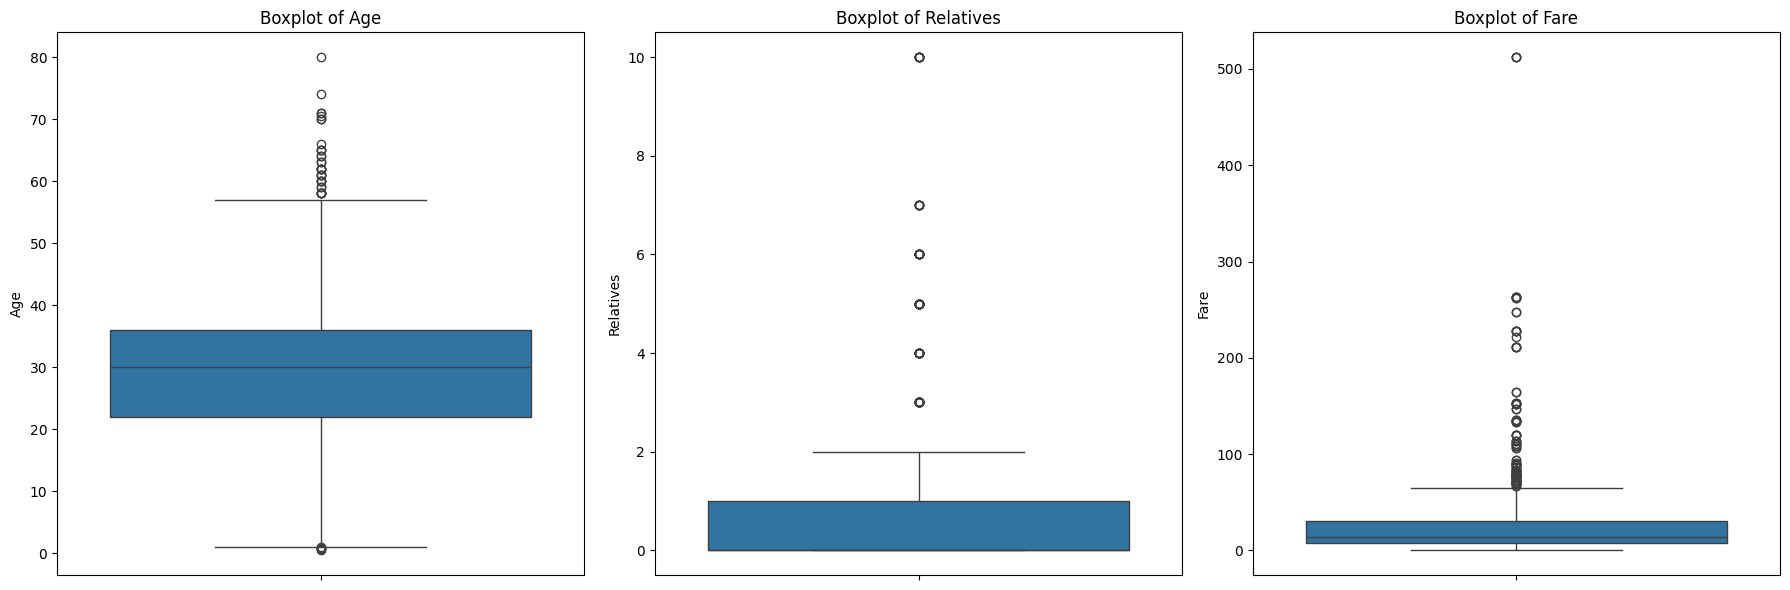

In [38]:
# Create a figure and three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Plot the boxplot of 'Age' on the first axis
sns.boxplot(data=train, y='Age', ax=axes[0])
axes[0].set_title('Boxplot of Age')

# Plot the boxplot of 'Relatives' on the second axis
sns.boxplot(data=train, y='Relatives', ax=axes[1])
axes[1].set_title('Boxplot of Relatives')

# Plot the boxplot of 'Fare' on the third axis
sns.boxplot(data=train, y='Fare', ax=axes[2])
axes[2].set_title('Boxplot of Fare')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [39]:
Pid= test['PassengerId']

dataset= [train, test]
for data in dataset:
    data.drop(['Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Title,Relatives,Deck,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,7.2500,2,1,8,0.0,0.0,1.0
1,2,1,1,0,38.0,71.2833,3,1,2,1.0,0.0,0.0
2,3,1,3,0,26.0,7.9250,1,0,8,0.0,0.0,1.0
3,4,1,1,0,35.0,53.1000,3,1,2,0.0,0.0,1.0
4,5,0,3,1,35.0,8.0500,2,0,8,0.0,0.0,1.0


In [40]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Title,Relatives,Deck,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,34.5,7.8292,3,0,7,0.0,1.0,0.0
1,893,3,0,47.0,7.0000,4,1,7,0.0,0.0,1.0
2,894,2,1,62.0,9.6875,3,0,7,0.0,1.0,0.0
3,895,3,1,27.0,8.6625,3,0,7,0.0,0.0,1.0
4,896,3,0,22.0,12.2875,4,2,7,0.0,0.0,1.0


In [41]:
corr_fare_surv = train['Fare'].corr(train['Survived'])
print(f"The correlation between Fare and Survived is: {corr_fare_surv}")

corr_fare_deck = train['Fare'].corr(train['Deck'])
print(f"The correlation between Fare and Deck is: {corr_fare_deck}")

corr_pclass_deck = train['Pclass'].corr(train['Deck'])
print(f"The correlation between Pclass and Deck is: {corr_pclass_deck}")

corr_deck_survived = train['Deck'].corr(train['Survived'])
print(f"The correlation between Deck and Survived is: {corr_deck_survived}")

The correlation between Fare and Survived is: 0.25730652238496177
The correlation between Fare and Deck is: -0.5230133923964833
The correlation between Pclass and Deck is: 0.7466157070176204
The correlation between Deck and Survived is: -0.3011159409577989


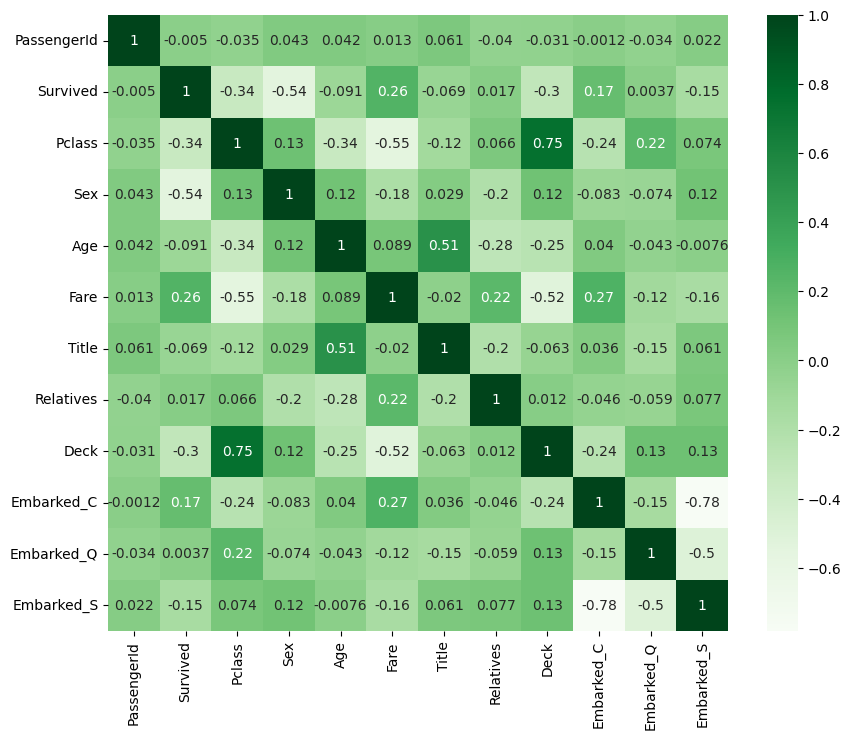

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(train.corr(), annot=True, cmap='Greens')
plt.show()

## 3) Training and Validation

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, log_loss, mean_squared_error
from sklearn.model_selection import KFold

### Normalization (Min/Max) or Standardization

In [44]:
features_to_predict = ['Pclass', 'Sex', 'Age', 'Fare', 'Title','Relatives', 'Deck', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [45]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train[features_to_predict]= scaler.fit_transform(train[features_to_predict])
test[features_to_predict]= scaler.fit_transform(test[features_to_predict])

train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Title,Relatives,Deck,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0.827377,0.737695,-0.590771,-0.502445,0.215896,0.059160,0.522067,-0.482043,-0.307562,0.615838
1,2,1,-1.566107,-1.355574,0.614586,0.786845,1.620005,0.059160,-1.917594,2.074505,-0.307562,-1.623803
2,3,1,0.827377,-1.355574,-0.289432,-0.488854,-1.188214,-0.560975,0.522067,-0.482043,-0.307562,0.615838
3,4,1,-1.566107,-1.355574,0.388582,0.420730,1.620005,0.059160,-1.917594,-0.482043,-0.307562,0.615838
4,5,0,0.827377,0.737695,0.388582,-0.486337,0.215896,-0.560975,0.522067,-0.482043,-0.307562,0.615838


In [46]:
y = train['Survived']
X = train[features_to_predict]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,Pclass,Sex,Age,Fare,Title,Relatives,Deck,Embarked_C,Embarked_Q,Embarked_S
331,-1.566107,0.737695,1.179597,-0.074583,0.215896,-0.560975,-1.917594,-0.482043,-0.307562,0.615838
733,-0.369365,0.737695,-0.515437,-0.386671,0.215896,-0.560975,0.522067,-0.482043,-0.307562,0.615838
382,0.827377,0.737695,0.162577,-0.488854,0.215896,-0.560975,0.522067,-0.482043,-0.307562,0.615838
704,0.827377,0.737695,-0.289432,-0.490280,0.215896,0.059160,0.522067,-0.482043,-0.307562,0.615838
813,0.827377,-1.355574,-1.796129,-0.018709,-1.188214,3.159833,0.522067,-0.482043,-0.307562,0.615838


### Voting Ensemble Model

In [47]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
knn_clf = KNeighborsClassifier()
grd_clf = GradientBoostingClassifier()

voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf), 
        ('rf', rnd_clf), 
        ('svc', svm_clf),
        ('grd', grd_clf)
    ],
    voting='hard'
)

In [52]:
voting_clf

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC()),
                             ('grd', GradientBoostingClassifier())])

In [53]:
# Validating accuracy and precision:

for clf in (log_clf, rnd_clf, svm_clf, knn_clf, grd_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    print(f"The {clf.__class__.__name__} has an Accuracy: {accuracy_score(y_val, y_pred):.4f} , and a Precision of: {precision_score(y_val, y_pred):.4f} ")

The LogisticRegression has an Accuracy: 0.8212 , and a Precision of: 0.8000 
The RandomForestClassifier has an Accuracy: 0.8268 , and a Precision of: 0.7792 
The SVC has an Accuracy: 0.8156 , and a Precision of: 0.8060 
The KNeighborsClassifier has an Accuracy: 0.8045 , and a Precision of: 0.7600 
The GradientBoostingClassifier has an Accuracy: 0.8268 , and a Precision of: 0.8028 
The VotingClassifier has an Accuracy: 0.8324 , and a Precision of: 0.8333 


In [51]:
# In order to test another Ensemble Method, I tested Bagging with DecisionTree Classifier. 
# The DecisionTree Classifier was choosed based on the accuracy and precision score evalueted before, among LogisticRegression, SVM, and RandomForest.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#First, implementing GridSearchCV to find the best parameters to perform DecisionTreeClassifier:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [8, 9, 10],
    'min_samples_split': range(6, 11),
    'min_samples_leaf': range(1, 4),
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0],
    'max_leaf_nodes': [80, 90, 100],
    'class_weight': [{0: 1, 1: w} for w in np.linspace(1.3, 1.7, 5)],
    'ccp_alpha': [4e-05, 5e-05, 6e-05]
}

dt_clf = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_clf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

#Fit GridSearchCV
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best Accuracy Score: {grid_search.best_score_}")

Fitting 3 folds for each of 24300 candidates, totalling 72900 fits
[CV] END ccp_alpha=4e-05, class_weight={0: 1, 1: 1.3}, criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=1, min_samples_split=6, random_state=0, splitter=best; total time=   0.0s
[CV] END ccp_alpha=4e-05, class_weight={0: 1, 1: 1.3}, criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=1, min_samples_split=6, random_state=0, splitter=best; total time=   0.0s
[CV] END ccp_alpha=4e-05, class_weight={0: 1, 1: 1.3}, criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=1, min_samples_split=6, random_state=0, splitter=best; total time=   0.0s
[CV] END ccp_alpha=4e-05, class_weight={0: 1, 1: 1.3}, criterion=gini, max_depth=8, max_features=sqrt, max_leaf_nodes=80, min_samples_leaf=1, min_samples_split=6, random_state=0, splitter=random; total time=   0.0s
[CV] END ccp_alpha=4e-05, class_weight={0: 1, 1: 1.3}, criterion=gini, max_dept

In [124]:
#Parameters found after perform GridSearch for decision tree classifier:

base_params = {
    'criterion': 'gini',
    'splitter': 'random',
    'max_depth': 10,
    'min_samples_split': 8,
    'min_samples_leaf': 2,
    'max_features': None,
    'random_state': 0,
    'max_leaf_nodes': 80,
    'class_weight': {0: 1, 1: 1.6},
    'ccp_alpha': 4e-05
}

#These parameters will be used at the BaggingClassifier:

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

# Instantiate the base model
base_model = DecisionTreeClassifier()

# Create BaggingClassifier
bagging_model = BaggingClassifier(estimator=base_model,
                                  n_estimators=500,
                                  max_samples=100,
                                  bootstrap=True,
                                  n_jobs=-1,
                                  random_state=0,
                                  oob_score=True)

# Fit BaggingClassifier
# bagging_model.fit(X_train, y_train)
bagging_model.fit(X, y)

print(bagging_model.oob_score_)

# y_pred = bagging_model.predict(X_val)

#print(bagging_model.__class__.__name__, accuracy_score(y_val, y_pred), precision_score(y_val, y_pred))

# ---- Using GridSearch on bagging model:

# Define the parameter grid for BaggingClassifier
param_grid_bagging = {
    'n_estimators': range(50, 351, 50),
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}


# Instantiate GridSearchCV
grid_search_bagging = GridSearchCV(estimator=bagging_model, param_grid=param_grid_bagging, cv=5, scoring='precision', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search_bagging.fit(X_train, y_train)

# Print the best parameters and best score
print("BaggingClassifier Best Parameters found:")
print(grid_search_bagging.best_params_)
print("BaggingClassifier Best Accuracy Score:")
print(grid_search_bagging.best_score_)

0.8294051627384961
Fitting 5 folds for each of 63 candidates, totalling 315 fits
[CV] END .max_features=0.5, max_samples=0.5, n_estimators=50; total time=   0.3s
[CV] END .max_features=0.5, max_samples=0.5, n_estimators=50; total time=   0.3s
[CV] END .max_features=0.5, max_samples=0.5, n_estimators=50; total time=   0.2s
[CV] END .max_features=0.5, max_samples=0.5, n_estimators=50; total time=   0.2s
[CV] END .max_features=0.5, max_samples=0.5, n_estimators=50; total time=   0.2s
[CV] END max_features=0.5, max_samples=0.5, n_estimators=100; total time=   0.4s
[CV] END max_features=0.5, max_samples=0.5, n_estimators=100; total time=   0.4s
[CV] END max_features=0.5, max_samples=0.5, n_estimators=100; total time=   0.4s
[CV] END max_features=0.5, max_samples=0.5, n_estimators=100; total time=   0.4s
[CV] END max_features=0.5, max_samples=0.5, n_estimators=100; total time=   0.5s
[CV] END max_features=0.5, max_samples=0.5, n_estimators=150; total time=   0.6s
[CV] END max_features=0.5, m

### K-fold Cross-Validation:

In [ ]:
# Setting up KFold to alternate the dataset
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Lists to store the metrics for each fold
accuracies = []
precisions = []
confusion_matrices = []

# Loop to train and validate the model in each fold
for train_index, val_index in kf.split(X):
    # Splitting the data into training and validation for each fold
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Initializing and training the model
    # model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    
    # Making predictions and calculating metrics for the validation set
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    cm = confusion_matrix(y_val, y_pred)
    
    # Saving the metrics
    accuracies.append(accuracy)
    precisions.append(precision)
    confusion_matrices.append(cm)

    # Displaying the metrics for each fold
    print(f"Fold Accuracy: {accuracy}")
    print(f"Fold Precision: {precision}")
    print(f"Fold Confusion Matrix:\n{cm}\n")

# Displaying the aggregated metrics after all folds
print(model.__class__.__name__)
print(f"\nCross-Validation Mean Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
print(f"Cross-Validation Mean Precision: {np.mean(precisions):.4f} ± {np.std(precisions):.4f}")


## Prediction on Test Data

In [54]:
# Setting 'Model' to predict the data bellow:

# model = log_clf
# model = grid_search.best_estimator_
# model = grid_search_bagging.best_estimator_
# model = bagging_model
model = voting_clf # Model to be used on different folds bellow.
# model = grd_clf

# Print the Class of the Model:
print(model.__class__.__name__)

VotingClassifier


In [55]:
#test = pd.read_csv('titanic/test.csv') #Real values on dataset

In [56]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Title,Relatives,Deck,Embarked_C,Embarked_Q,Embarked_S
0,892,0.873482,0.755929,0.330862,-0.498407,0.165027,-0.553443,0.500456,-0.568142,2.843757,-1.350676
1,893,0.873482,-1.322876,1.292083,-0.513274,1.491590,0.105643,0.500456,-0.568142,-0.351647,0.740370
2,894,-0.315819,0.755929,2.445548,-0.465088,0.165027,-0.553443,0.500456,-0.568142,2.843757,-1.350676
3,895,0.873482,0.755929,-0.245870,-0.483466,0.165027,-0.553443,0.500456,-0.568142,-0.351647,0.740370
4,896,0.873482,-1.322876,-0.630358,-0.418471,1.491590,0.764728,0.500456,-0.568142,-0.351647,0.740370


In [57]:
# Make predictions on the dataset to forecast
predictions = []
predictions = model.predict(test[features_to_predict])
print(type(predictions))
predictions = pd.DataFrame(predictions)

#predictions[['Prob_previsão_0', 'Prob_previsão_1']] = pd.DataFrame(model.predict_proba(test[features_to_predict]))
#print(type(predictions))
#test[['Valor_previsto', 'Prob_previsão_0', 'Prob_previsão_1']] = predictions
test['Valor_previsto'] = predictions
test.head()

<class 'numpy.ndarray'>


,PassengerId,Pclass,Sex,Age,Fare,Title,Relatives,Deck,Embarked_C,Embarked_Q,Embarked_S,Valor_previsto
0,892,0.873482,0.755929,0.330862,-0.498407,0.165027,-0.553443,0.500456,-0.568142,2.843757,-1.350676,0
1,893,0.873482,-1.322876,1.292083,-0.513274,1.491590,0.105643,0.500456,-0.568142,-0.351647,0.740370,0
2,894,-0.315819,0.755929,2.445548,-0.465088,0.165027,-0.553443,0.500456,-0.568142,2.843757,-1.350676,0
3,895,0.873482,0.755929,-0.245870,-0.483466,0.165027,-0.553443,0.500456,-0.568142,-0.351647,0.740370,0
4,896,0.873482,-1.322876,-0.630358,-0.418471,1.491590,0.764728,0.500456,-0.568142,-0.351647,0.740370,1


In [58]:
df_real_values = pd.read_csv('titanic/gender_submission.csv') #Valores reais do dataset de test
df_real_values.head(300)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
295,1187,0
296,1188,1
297,1189,0
298,1190,0


In [60]:
# Testing the accuracy of the predictions on the test data
accuracy = accuracy_score(df_real_values['Survived'],test['Valor_previsto'])
precisao = precision_score(df_real_values['Survived'],test['Valor_previsto'])
print(f"Acuracy: {accuracy}")
print(f'Precisão: {precisao}')
print(confusion_matrix(df_real_values['Survived'],test['Valor_previsto']))

Acuracy: 0.9090909090909091
Precisão: 0.9014084507042254
[[252  14]
 [ 24 128]]


In [61]:
#Final Data Frame with prediction

test = pd.read_csv('titanic/test.csv') #Importando o DataSet de Teste Original

#test[['Valor_previsto', 'Prob_previsão_0', 'Prob_previsão_1']] = predictions #Atribuindo as colunas de teste
test['Valor_previsto'] = predictions #Atribuindo as colunas de teste

df_test_predicted = pd.merge(test, df_real_values, on='PassengerId', how='left')

df_test_predicted.to_csv('df_test_predicted.csv', index=False)

df_test_predicted.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Valor_previsto,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,1


In [62]:
#DataFrame with predictions only

df_test_predicted_submission = pd.DataFrame()

df_test_predicted_submission[['PassengerId','Survived']] = df_test_predicted[['PassengerId', 'Valor_previsto']]

df_test_predicted_submission.to_csv('df_test_predicted_submission.csv', index=False)

df_test_predicted_submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
